### Load model saved in model pipeline

In [98]:
import joblib

# load best model
model_path = "../saved_models/best_model.joblib"  
best = joblib.load(model_path)

### Read train data to get feature names

In [99]:
import pandas as pd

train = pd.read_csv("~/DS/dataiku/data/train.csv")

### Feature importance

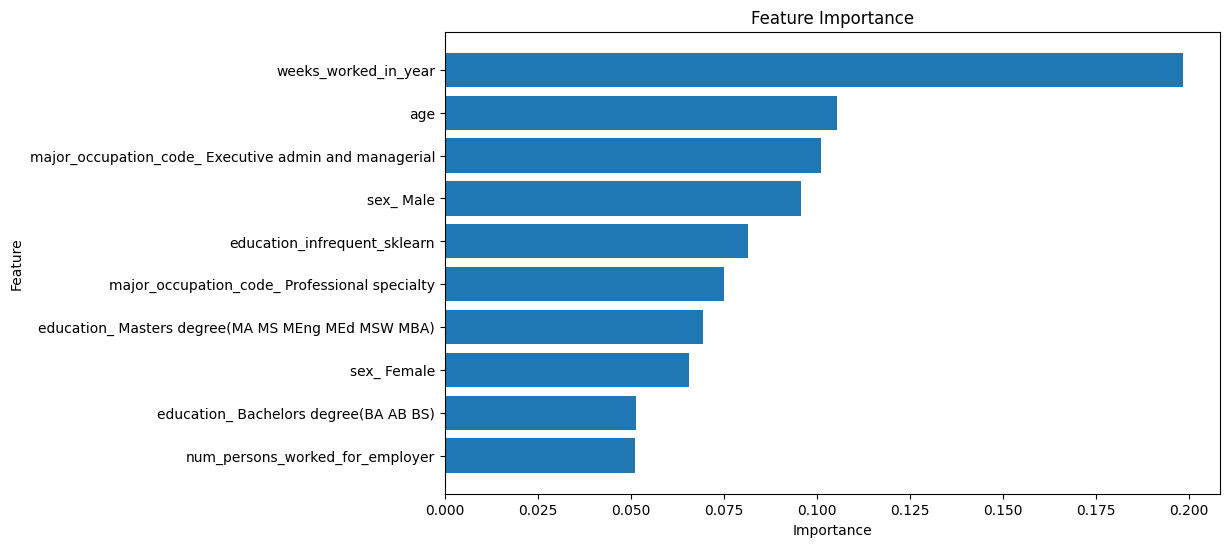

In [100]:
import matplotlib.pyplot as plt

X = train[[col for col in train.columns if col!='target']]

# Access feature importance scores
feature_importance = best.feature_importances_

# Get the names of the features (assuming you have them)
feature_names = X.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True).tail(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [101]:
feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

,Feature,Importance
70,weeks_worked_in_year,0.198475
69,age,0.105342
34,major_occupation_code_ Executive admin and man...,0.101276
29,sex_ Male,0.095835
21,education_infrequent_sklearn,0.081570
41,major_occupation_code_ Professional specialty,0.075021
19,education_ Masters degree(MA MS MEng MEd MSW MBA),0.069392
28,sex_ Female,0.065630
16,education_ Bachelors degree(BA AB BS),0.051286
71,num_persons_worked_for_employer,0.051202


#### Trialling different feature importance plots
- More likely to earn more the older you get

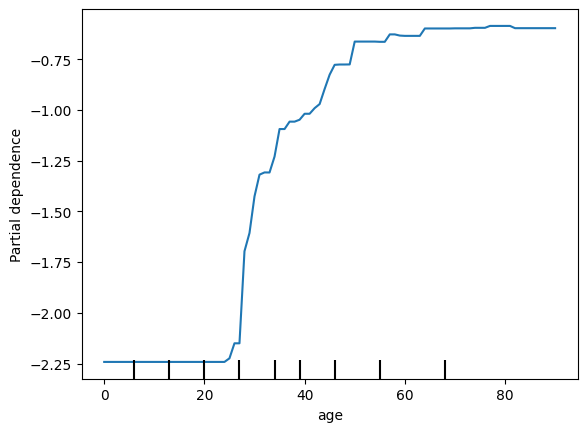

In [102]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(best, X, features=['age'], grid_resolution=100)

#### Shap values to explain why features are important

100%|===================| 196107/196294 [07:19<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


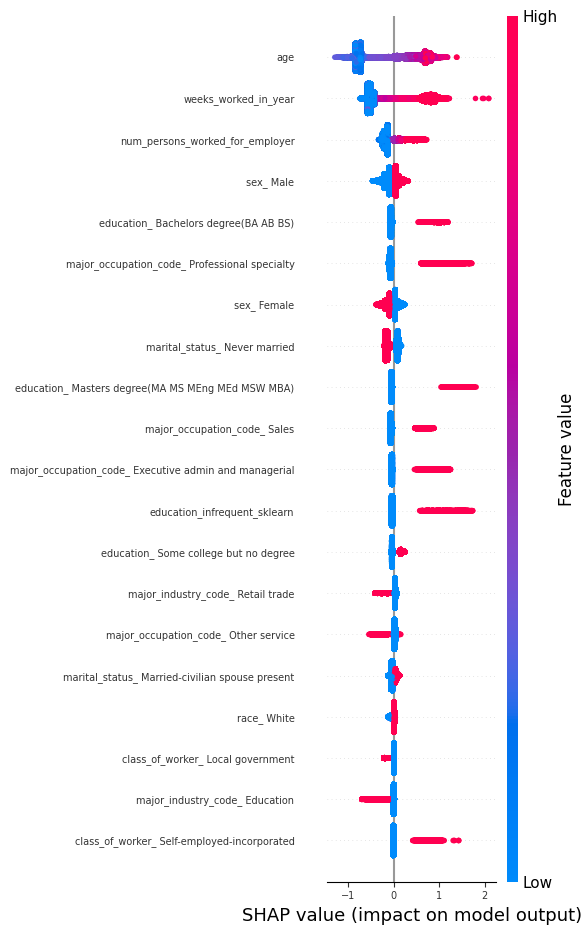

In [103]:
import shap

explainer = shap.Explainer(best, X)
shap_values = explainer(X)


# Create a Shap summary plot with shortened column labels
shap.summary_plot(shap_values, X, show=False)

# Get the current figure and axes objects. from @GarrettCGraham code
fig, ax = plt.gcf(), plt.gca()

# Modifying main plot parameters
ax.tick_params(labelsize=7)

plt.show()

## Performance Analysis

In [104]:
# predictions
test_preds = pd.read_csv('~/DS/dataiku/data/test_predictions.csv')
train_preds = pd.read_csv('~/DS/dataiku/data/train_predictions.csv')

#### ROC Curve

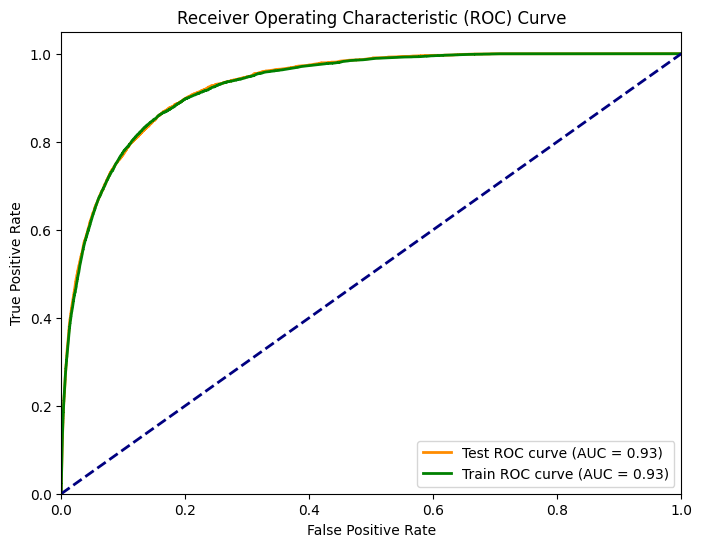

In [109]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_preds['target'], test_preds['prob'])
fpr_tr, tpr_tr, thresholds_tr = roc_curve(train_preds['target'], train_preds['prob'])

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc_tr = auc(fpr_tr, tpr_tr)


# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_tr, tpr_tr, color='green', lw=2, label=f'Train ROC curve (AUC = {roc_auc_tr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

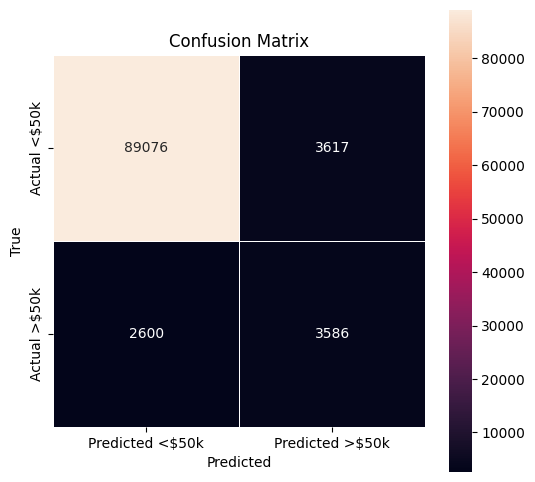

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(test_preds['target'], test_preds['prediction'])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', linewidths=0.5, square=True,
            xticklabels=['Predicted <$50k', 'Predicted >$50k'], yticklabels=['Actual <$50k', 'Actual >$50k'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

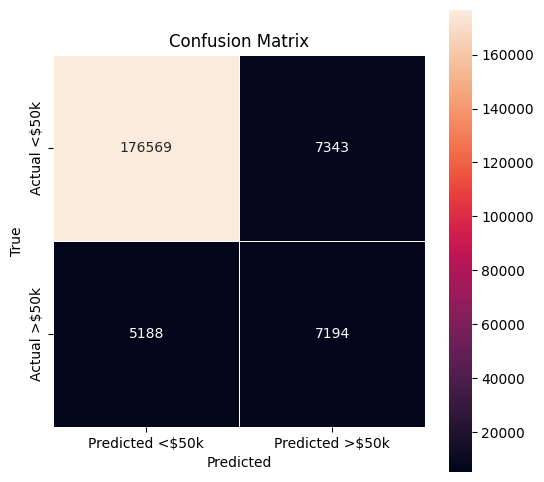

In [111]:
# Calculate the confusion matrix
cm = confusion_matrix(train_preds['target'], train_preds['prediction'])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', linewidths=0.5, square=True,
            xticklabels=['Predicted <$50k', 'Predicted >$50k'], yticklabels=['Actual <$50k', 'Actual >$50k'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Classification report
- Train and test performance is very similar: overfitting not present

In [112]:
from sklearn.metrics import classification_report

print(classification_report(test_preds['target'], test_preds['prediction']))

print(classification_report(train_preds['target'], train_preds['prediction']))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     92693
           1       0.50      0.58      0.54      6186

    accuracy                           0.94     98879
   macro avg       0.73      0.77      0.75     98879
weighted avg       0.94      0.94      0.94     98879

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    183912
           1       0.49      0.58      0.53     12382

    accuracy                           0.94    196294
   macro avg       0.73      0.77      0.75    196294
weighted avg       0.94      0.94      0.94    196294

